In [3]:
import itertools
import random

%matplotlib inline
import networkx as nx

In [24]:
p = 0.75

# Do this 10 times
for _ in range(10):
    r = random.random()
    if r < p:
        print('ahmed')
    else:
        print('khaled')

ahmed
ahmed
khaled
ahmed
ahmed
ahmed
khaled
ahmed
ahmed
ahmed


In [25]:
names = ['Alice', 'Bob', 'Cathy', 'Dan']
random.choice(names)

'Alice'

In [26]:
G = nx.cycle_graph(5)
random.sample(G.nodes, 2)

C:\Users\dell\AppData\Local\Temp/ipykernel_9312/1435685415.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(G.nodes, 2)


[2, 0]

In [27]:
names = ['ali', 'Bob', 'mohamed']
tickets = [1, 3, 4]

for _ in range(10):
    print(random.choices(names, tickets))

['mohamed']
['ali']
['mohamed']
['mohamed']
['mohamed']
['mohamed']
['mohamed']
['ali']
['mohamed']
['Bob']


In [28]:
random.choices(names, tickets, k=10)

['Bob',
 'Bob',
 'mohamed',
 'Bob',
 'Bob',
 'mohamed',
 'mohamed',
 'mohamed',
 'mohamed',
 'mohamed']

In [29]:
elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [30]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [31]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = random.random()
        if r < p:
            G.add_edge(i, j)
        # Do nothing if r >= p
        
    return G

Graph has 21 edges.


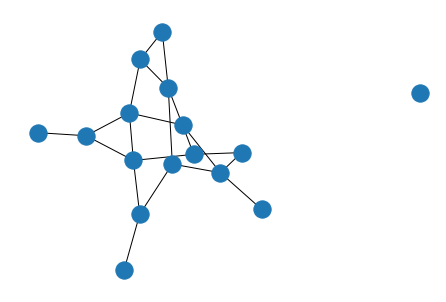

In [12]:
G = gnp_random_graph(16, 0.15)
nx.draw(G)
print('Graph has', G.number_of_edges(), 'edges.')

In [32]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G

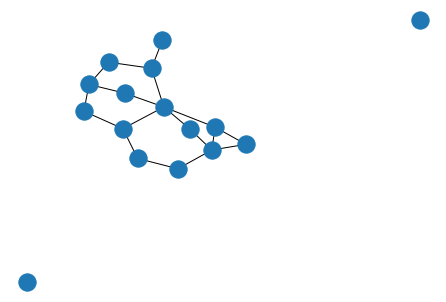

In [33]:
G = gnm_random_graph(16, 18)
nx.draw(G)

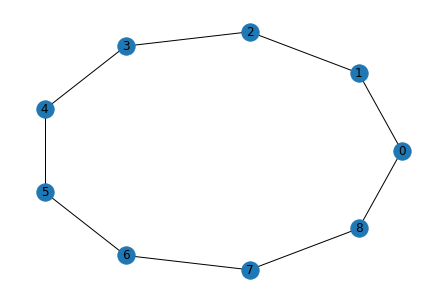

In [36]:
N = 9
G = nx.cycle_graph(N)
nx.draw_circular(G, with_labels=True)

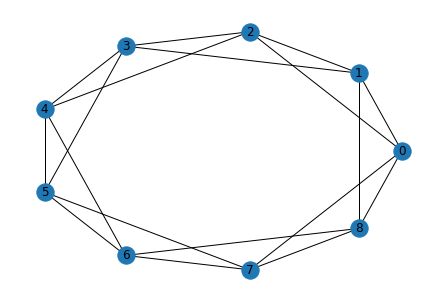

In [37]:
k = 5

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True)

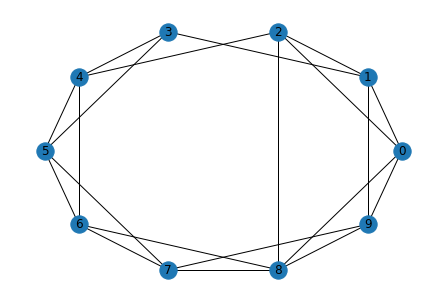

In [17]:
p = 0.1

for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True)

In [38]:
def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G.add_edge(n, left)
            G.add_edge(n, right)
    
    # 3. Rewire edges with probability p
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G

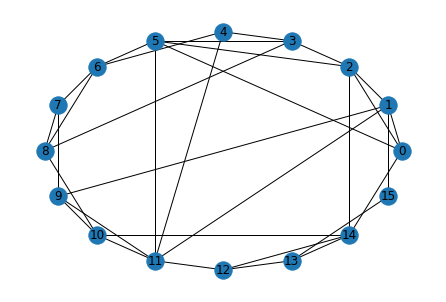

In [20]:
G = watts_strogatz_graph(16, 4, 0.2)
nx.draw_circular(G, with_labels=True)

[4, 1, 1, 1, 1]


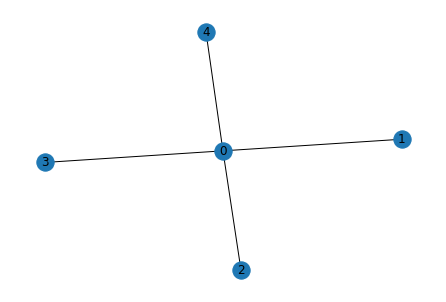

In [39]:
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw(G, with_labels=True)

In [40]:
def barabasi_albert_graph(N, m):
    # 1. Start with a clique of m+1 nodes
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        # 2. Select m different nodes at random, weighted by their degree.
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        # 3. Add a new node i and link it with the m nodes from the previous step.
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

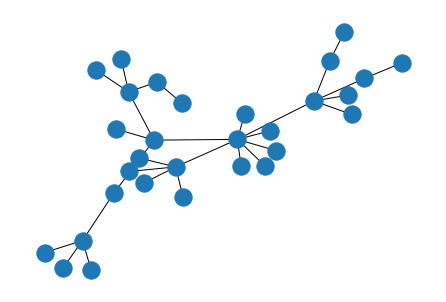

In [41]:
G = barabasi_albert_graph(30, 1)
nx.draw(G)